<a href="https://colab.research.google.com/github/JuanTabarez/Analisis_Numerico_2020_2/blob/master/Problema_5_Steepest_Descent_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problema 5 del metodo gradiente descendiente**

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import sympy as sp

In [4]:
def f(x1,x2):
    return ((1-x1)**2)+(100*(x2-x1**2)**2)

def grad(x1,x2): 
    return np.array([-2*(1-x1) -400*x1*(x2-x1**2), 
                     200*(x2-x1**2)])


def gd1(x, f, grad, a, max_iter): #Gradiente desendiente paso optimizado
  xs = np.zeros((1 + max_iter, 2))
  xs[0,:] = x

  for i in range(max_iter):
    g = grad(x[0],x[1])
    def phi(s):
      return f(x[0]-s*g[0],x[1]-s*g[1])

    a = optimize.fminbound(phi, 0, 10)

    x = x - a * g
    xs[i+1,:] = x

    tol = abs(f(xs[i+1,0],xs[i+1,1])-f(xs[i,0],xs[i,1]))/max(1,abs(f(xs[i,0],xs[i,1])))
    if tol < epsi:
      break
  return xs,i+1


def gd2(x, grad, a, max_iter, epsi): #Gradiente desendiente paso fijo    
  xs = np.zeros((1 + max_iter, 2))
  xs[0,:] = x

  for i in range(max_iter):
      x = x - a * grad(x[0],x[1])
      xs[i+1,:] = x

      #tolerancia: criterio de finalización
      tol = abs(f(xs[i+1,0],xs[i+1,1])-f(xs[i,0],xs[i,1]))/max(1,abs(f(xs[i,0],xs[i,1])))
      if tol < epsi: #en caso tal de no encontrar un optimo finalizar con el algoritmo
        break
        
  return xs,i+1

In [5]:
x = np.array([-1,1])    #solo encuentra el minimo global de (1,1) con x0= -1,1, no con -1,-1 como indica el enunciado del problema
epsi = 0.001
max_iter = 10000

0.9999988294798469 0.9999976513963927


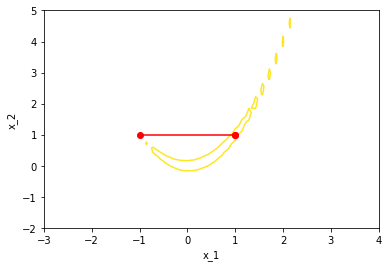

In [7]:
res1 = gd1(x, f, grad, epsi, max_iter)
xs1 = res1[0]
i1 = res1[1]


xx = np.linspace(-3, 4)
yy = np.linspace(-2, 5)
X, Y = np.meshgrid(xx, yy)
Z = ((1-X)**2) + (100*(Y-X**2)**2)
function = f(xs1[0:i1+1,0],xs1[0:i1+1,1])
c = plt.contour(X, Y, Z, np.flip(function))
plt.plot(xs1[0:i1+1,0],xs1[0:i1+1,1],'-ro')
plt.xlabel('x_1')
plt.ylabel('x_2')
print(xs1[i1,0],xs1[i1,1])

Text(0, 0.5, 'f(x)')

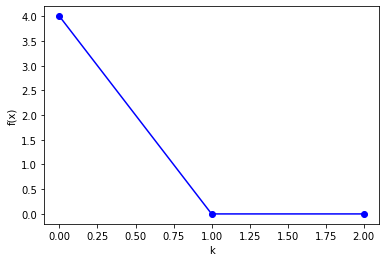

In [8]:
plt.plot(f(xs1[0:i1+1,0],xs1[0:i1+1,1]),'-bo')
plt.xlabel('k')
plt.ylabel('f(x)')

In [11]:
#Con gradiente desendiente de paso fijo
x = np.array([-1,1])
max_iter = 1000
epsi = 0.001 #tolerancia
a = 0.5 #tamaño de paso fijo

res2 = gd2(x, grad, a, max_iter,epsi)
xs2 = res2[0]
i2 = res2[1]



ValueError: ignored

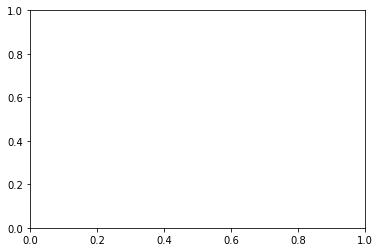

In [14]:

xx = np.linspace(-1, 1.75)
yy = np.linspace(-2, 3.5)
X, Y = np.meshgrid(xx, yy)
Z = ((1-X)**2) + (100*(Y-X**2)**2)
function = f(xs2[0:i2+1,0],xs2[0:i2+1,1])
c = plt.contour(X, Y, Z, np.flip(function))
plt.plot(xs2[0:i2+1,0],xs2[0:i2+1,1] , '-ro')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
print(xs2[i2,0],xs2[i2,1]) 

Text(0, 0.5, 'f(x)')

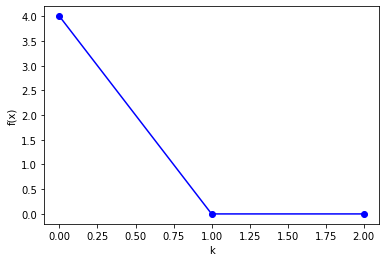

In [13]:
plt.plot(f(xs2[0:i2+1,0],xs2[0:i2+1,1]),'-bo')
plt.xlabel('k')
plt.ylabel('f(x)')